# PHYS 267 Final Project: Physics Education Research
**Team: Devejya Raghuvanshi, Kevin Bacabac**


## Introduction

NOTES:
- Data Preprocessing Note
    - Note that Likert type scale is converted to -5 to 5 in the data collection process.
    - Since our main question and hypothesis refer to an overall change in students attitude. Therefore, instead of analysing the students answer for each question, we use the calculate an overall student attitude metric to compare pre and post lab.
    - The Student Attitude Metric is a weighted sum of scores for each of the questions answered by a particular student. A weight of +1 or -1 is assigned to the score for each question. 
    How we assign weights:
        - +1: If higher score on that question indicates positive attitude by the student towards the lab.
        - -1: If higher score on the question indicates negative attitude by the student towards the lab.
        - 0: If the answers to the question do not indicate either positive or negative attitude. 
        - Higher Student attitude metric means more positive attitude and smaller means more negative attitude.
    
    - This assumes each question has the same importance.




## Data Pre-Processing

In [25]:
import pandas as pd 
import numpy as np

# Read Data
prelab = pd.read_excel("PHYS267_DataSet_PER.xlsx", sheet_name=0)
postlab = pd.read_excel("PHYS267_DataSet_PER.xlsx", sheet_name=1)

# Data Preview
prelab.head()


,Unnamed: 0,Question,1,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,2,Unnamed: 8,Unnamed: 9,...,Unnamed: 26,Unnamed: 27,Unnamed: 28,5,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35
0,Student #,Sub Question,1.0,2.0,3.0,4.0,5.0,1.0,2.0,3.0,...,5.0,6.0,7.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0
1,1,NaN,4.0,3.0,3.0,4.0,2.0,4.0,5.0,5.0,...,5.0,3.0,4.0,3.0,3.0,3.0,3.0,4.0,2.0,4.0
2,2,NaN,4.0,2.0,4.0,2.0,3.0,4.0,4.0,4.0,...,5.0,5.0,5.0,4.0,4.0,4.0,5.0,5.0,4.0,5.0
3,3,NaN,1.0,1.0,1.0,1.0,1.0,4.0,4.0,4.0,...,5.0,5.0,4.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0
4,4,NaN,2.0,3.0,3.0,2.0,3.0,4.0,3.0,1.0,...,3.0,2.0,3.0,2.0,4.0,2.0,4.0,4.0,2.0,3.0


In [26]:
# Data Restructuring
d = {}
d["Q1"] = pd.DataFrame(columns=["1", "2", "3", "4", "5"],\
    data=prelab[[1,'Unnamed: 3',
         'Unnamed: 4','Unnamed: 5','Unnamed: 6']].values[1:]
)
d["Q2"] = pd.DataFrame(columns=["1", "2", "3", "4", "5", "6", "7", "8", "9", "10" ,"11"],\
    data=prelab[[2,
        'Unnamed: 8',  'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17']].values[1:]
)
d["Q3"] = pd.DataFrame(columns=["1", "2", "3", "4"],\
    data=prelab[[3, 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21']].values[1:]
)
d["Q4"] = pd.DataFrame(columns=["1", "2", "3", "4", "5", "6", "7"],\
    data=prelab[[4, 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28']].values[1:]
)
d["Q5"] = pd.DataFrame(columns=["1", "2", "3", "4", "5", "6", "7"],\
    data=prelab[[5, 'Unnamed: 30', 'Unnamed: 31',
       'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35']].values[1:]
)
prelab_studentnum = prelab['Unnamed: 0'][1:].values
prelab_q = pd.concat(d, axis=1)
prelab_q.index = prelab_studentnum
prelab_q.head()


Q1                       Q2                      ...   Q4             Q5  \
     1    2    3    4    5    1    2    3    4    5  ...    5    6    7    1   
1  4.0  3.0  3.0  4.0  2.0  4.0  5.0  5.0  4.0  4.0  ...  5.0  3.0  4.0  3.0   
2  4.0  2.0  4.0  2.0  3.0  4.0  4.0  4.0  3.0  4.0  ...  5.0  5.0  5.0  4.0   
3  1.0  1.0  1.0  1.0  1.0  4.0  4.0  4.0  5.0  5.0  ...  5.0  5.0  4.0  5.0   
4  2.0  3.0  3.0  2.0  3.0  4.0  3.0  1.0  2.0  3.0  ...  3.0  2.0  3.0  2.0   
5  NaN  NaN  NaN  NaN  NaN  5.0  4.0  4.0  3.0  4.0  ...  4.0  5.0  5.0  5.0   

                                 
     2    3    4    5    6    7  
1  3.0  3.0  3.0  4.0  2.0  4.0  
2  4.0  4.0  5.0  5.0  4.0  5.0  
3  4.0  5.0  5.0  5.0  5.0  4.0  
4  4.0  2.0  4.0  4.0  2.0  3.0  
5  5.0  5.0  4.0  5.0  4.0  5.0  

[5 rows x 34 columns]

Now we have a dataframe, which each row contains the answers by a student for each question-subquestion (eg. column: (Q1,1)).

In [27]:
import matplotlib.pyplot as plt
d2 = {}
d2["Q1"] = pd.DataFrame(columns=["1", "2", "3", "4", "5"],\
    data=postlab[[1,'Unnamed: 3',
         'Unnamed: 4','Unnamed: 5','Unnamed: 6']].values[1:]
)
d2["Q2"] = pd.DataFrame(columns=["1", "2", "3", "4", "5", "6", "7", "8", "9", "10" ,"11"],\
    data=postlab[[2,
        'Unnamed: 8',  'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17']].values[1:]
)
d2["Q3"] = pd.DataFrame(columns=["1", "2", "3", "4"],\
    data=postlab[[3, 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21']].values[1:]
)
d2["Q4"] = pd.DataFrame(columns=["1", "2", "3", "4", "5", "6", "7"],\
    data=postlab[[4, 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28']].values[1:]
)
d2["Q5"] = pd.DataFrame(columns=["1", "2", "3", "4", "5", "6", "7"],\
    data=postlab[[5, 'Unnamed: 30', 'Unnamed: 31',
       'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35']].values[1:]
)
postlab_studentnum = postlab['Unnamed: 0'][1:].values
postlab_q = pd.concat(d2, axis=1)
postlab_q.index = postlab_studentnum
# Dropping all rows with any NaN values
postlab_q.dropna(inplace=True)
prelab_q.dropna(inplace=True)


## Exploratory Data Analysis (EDA)

#### Steps:
* Caclulate the Student Attitude metric for each student pre and post lab.
* Data Visualization. (eg. Histograms, Piecharts, Line Plots)
* Distribution Statistics. (eg. Moments of the distribution)

The EDA also includes a small discussion regarding the observations from the exploration.

### EDA Step 1: Calculation of the Student Attitude metric & Data Visualization:




In [28]:
# Data Preprocessing 

# Frequency Table
frequency_dataframe_columns = ['Q1p1','Q1p2','Q1p3','Q1p4','Q1p5','Q2p1'
,'Q2p2','Q2p3','Q2p4','Q2p5','Q2p6','Q2p7','Q2p8','Q2p9','Q2p10','Q2p11',
'Q3p1','Q3p2','Q3p3','Q3p4','Q4p1','Q4p2','Q4p3','Q4p4','Q4p5','Q4p6',
'Q4p7','Q5p1','Q5p1','Q5p3','Q5p4','Q5p5','Q5p6','Q5p7']
frequency_table = []
for col in postlab_q.columns:
    frequency_table.append(list(postlab_q[col].value_counts().sort_index()))
frequency_df = pd.DataFrame(frequency_table).transpose()
frequency_df.columns = frequency_dataframe_columns
frequency_df.index = [1,2,3,4,5]
frequency_df

# Student Attitude Scores per student Pre and Post Lab
weights=[
    1, 1, 1, 1, 1,
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
    0, 1, 0, 0,
    -1, -1, -1, -1, -1, 1, 1,
    1, 1, 1, -1, 1, -1, -1
]
weighted_postlab_q = postlab_q.mul(weights)
weighted_prelab_q = prelab_q.mul(weights)
pre_post_lab = pd.DataFrame(list(zip(list(weighted_prelab_q.sum(axis=1)), list(weighted_postlab_q.sum(axis=1)))), 
columns=["Prelab", "Postlab"])

# Dataframe with overall Student Attitude metric per student pre and post lab
pre_post_lab


,Prelab,Postlab
0,53.0,51.0
1,49.0,47.0
2,52.0,54.0
3,33.0,47.0
4,49.0,50.0
...,...,...
118,44.0,46.0
119,71.0,75.0
120,46.0,65.0
121,53.0,43.0


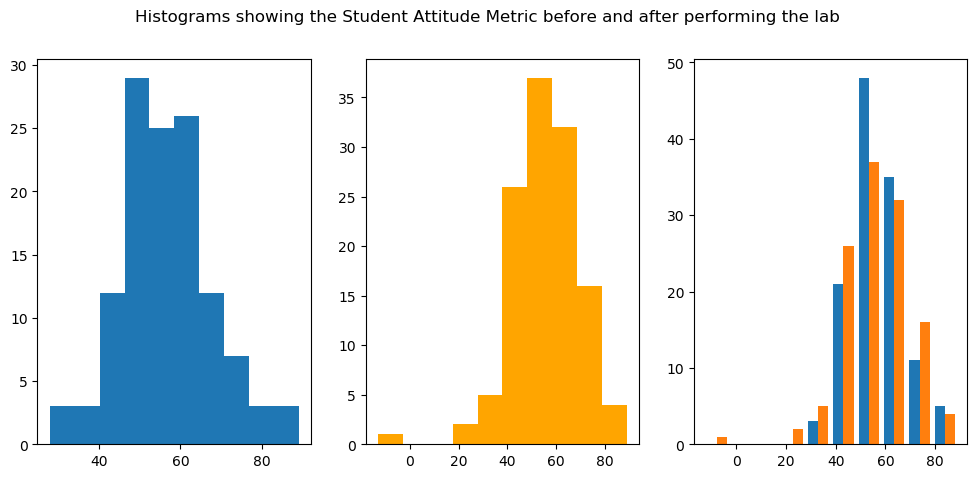

In [37]:
# Plotting histograms for combined weights
fig, ax = plt.subplots(1, 3, figsize=(12, 5))

fig.suptitle("Histograms showing the Student Attitude Metric before and after performing the lab")
presum = pre_post_lab.Prelab
postsum = pre_post_lab.Postlab
ax[0].hist(presum)
ax[1].hist(postsum, color='orange')
ax[2].hist((presum, postsum), label=['Before', 'After'])

plt.show()

In [30]:
# Plotting histograms for all sub-questions
# fig, ax = plt.subplots(len(q_df.columns), 3, figsize=(12,60))
# fig.suptitle("Histograms showing Student Answers Question 1 (all subquestions) of the Attitude Survey")

# Plot every graph independently
# for side, q_df in enumerate((prelab_q, postlab_q)):
#    y = 0
#    for subq in q_df.columns:
#        # ax[y,side].set_title('Q1 Before')
#        ax[y,side].hist(q_df[subq], density=True, bins=5, color=['blue', 'orange'][side])
#        y += 1

# Plotting Side-by-Side Histogram
# y = 0
# for subq in prelab_q.columns:
#     ax[y,2].hist((prelab_q[subq], postlab_q[subq]), density=True, bins=5, label=['Pre', 'Post'])
#     y += 1

# plt.show()

Q5.3 -0.3902439024390243 Practicing in a physics lab can improve my ability to plan and design experiments well.
Q5.1 -0.45528455284552827 Practicing in a physics lab course can help me come up with particularly good experimental research questions.
Q1.4 -0.46341463414634143 I am in control of doing interesting experiments in a physics lab.


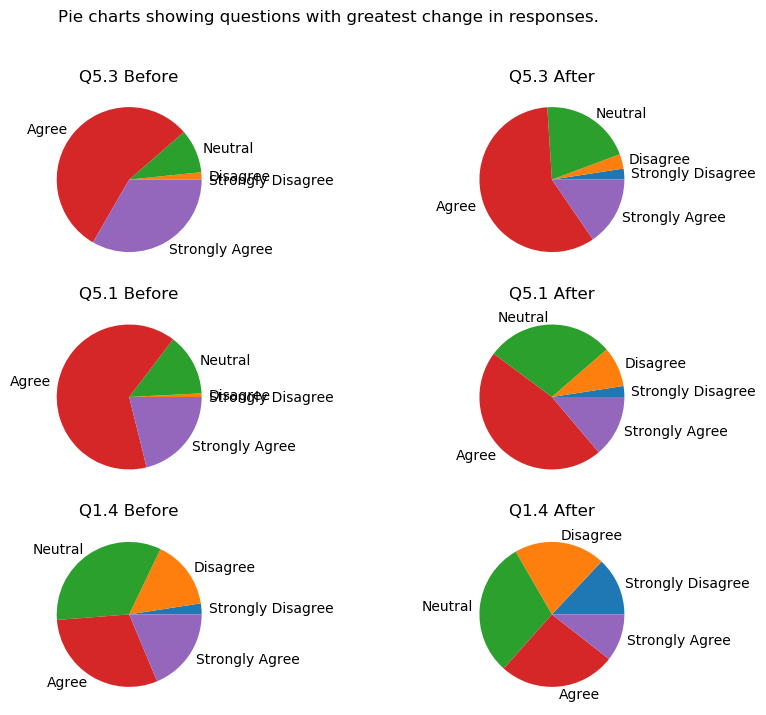

In [31]:
# Plotting PieCharts

# Get the questions with the greatest fluctuation
delta_q = weighted_postlab_q.mean() - weighted_prelab_q.mean()
pie_df = delta_q.abs().sort_values().tail(3)

# Plotting histograms for all sub-questions
fig, ax = plt.subplots(len(pie_df), 2, figsize=(10,8))
fig.suptitle("Pie charts showing questions with greatest change in responses.")

labels = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree']

y = 0
# Plot each question on a separate row
for subq in pie_df.index:
    # Plot before and after side by side
    for side, q_df in enumerate((prelab_q, postlab_q)):
        q_df2 = q_df[subq].value_counts()
        values = []
        for i in range(1, 6):
            if i not in q_df2:
                values.append(0)
            else:
                values.append(q_df2[i])
        
        q = '.'.join(subq)
        state = ['Before', 'After'][side]
        ax[y,side].set_title(f'{q} {state}')
        ax[y,side].pie(values, labels=labels)
    y += 1

print("Q5.3", delta_q[('Q5', '3')], "Practicing in a physics lab can improve my ability to plan and design experiments well.")
print("Q5.1", delta_q[('Q5', '1')], "Practicing in a physics lab course can help me come up with particularly good experimental research questions.")
print("Q1.4", delta_q[('Q1', '4')], "I am in control of doing interesting experiments in a physics lab.")
plt.show()

#### Discussion: Data Visualization

From the pie charts we are surprised to find the greatest difference in questions are from a loss of confidence after conducting a lab! This may be due to negativity bias if students are judging a loss of confidence more harshly than a gain.
The side-by-side histograms describing the individual and cumultative responses reveal responses changed significantly across many questions. Side-by-Side Histograms best describe the data we have because they allow us to precisely determine the change in frequency of responses across questions.

### EDA Step 2: Distribution Statistics 

Here we find all the moments for our data to better understand the distribution the data follows.

In [32]:
from scipy.stats import moment
import numpy as np
moments_pre = [pre_post_lab.Prelab.mean(), pre_post_lab.Prelab.var(), pre_post_lab.Prelab.skew(), pre_post_lab.Prelab.kurt()]
moments_post = [pre_post_lab.Postlab.mean(), pre_post_lab.Postlab.var(), pre_post_lab.Postlab.skew(), pre_post_lab.Postlab.kurt()]
moments = pd.DataFrame([moments_pre, moments_post],
    columns=["mean", "variance", "skew", "excess-kurtosis"], index=["prelab", "postlab"])
moments

,mean,variance,skew,excess-kurtosis
prelab,56.715447,119.336399,0.387210,0.694737
postlab,55.341463,185.997201,-0.948467,4.241005


From the table above, we observe:

* Means of the Student Attitude scores prior to and after performing the lab have changed. Students had a higher mean Student Attitude score prior to performing the lab (56.7), compared to after (55.3).

* However, the variance in the Student Attitude scores increased considerably after performing the lab (119 to 186).

* The skew in the Student Attitude scores prior to performing the lab was 0.39, indicating a right or positive skew to the distribution. Since the skew is close to 0, the distribution is normal to half-normal. After the lab however, the skew of the data was -0.94, indicating a left- or negative-skew, while remaining normal to half-normal distribution.

* Since the excess-kurtosis of the Student Attitude scores prior to and after performing the lab is $> 0$. Thus, the distributions are Leptokurtic. 

# Analysis

In this section, we use several statistical tests to compare the student attitudes about laboratory physics prior to and after performing the Physics lab.

Our main objective is to learn whether the students attitudes changed after performing the lab, compared to their attitudes before performing the lab.

However, in addition to that objective, from our data analysis above, we have learnt that another question that warrants investigation is whether the attitude of the students worsened after performing the lab. Thus, we will also be testing for that question.

### Which statistical tests did we choose?
Since the data is half-normallly distributed, therefore we will mostly be performing parametric tests. However, in addition to parametric tests, we will also perform some non-parametric tests to help answer our question. 

Since the measures of interest are the mean of the distribution and the distributions itself, and we have two paired samples, we will be using Paired t-test (One-way and two-way), Wilcoxons Signed Rank Test (One-way and Two-Way) and Chi-Squared test.

#### Paired t-test

Reasons for using paired t-test are:

* Data is half-normally distributed so we can use parametric test such as paired t-test.
* The two samples are paired, since the same set of students are surveyed prior to and after the lab.
* The measure being tested is the mean of the samples.

Let the mean student attitude score prior to performing the lab be $\mu_{pre}$, and after performin the lab be $\mu_{post}$.

The null and alternative hypotheses for the two-way comparison are:

$H_0$: $\mu_{pre}=\mu_{post}$

$H_1$: $\mu_{pre} \neq \mu_{post}$


In [33]:
from scipy.stats import ttest_rel

ttest_rel(pre_post_lab.Prelab, pre_post_lab.Postlab)


Ttest_relResult(statistic=1.2178984023741066, pvalue=0.22561279967621176)

From the Two-Way Paired t-test, we observe t-statistic of $1.22$ with p-value $0.23$.

The null and alternative hypotheses for the one-way comparison are:

$H_0$: $\mu_{pre} = \mu_{post}$

$H_1$: $\mu_{pre} > \mu_{post}$

Below is the One-way Paired t-test comparing the sample. 

In [34]:
ttest_rel(pre_post_lab.Prelab, pre_post_lab.Postlab, alternative='greater')


Ttest_relResult(statistic=1.2178984023741066, pvalue=0.11280639983810588)

From the One-Way Paired t-test, we observe t-statistic of $1.22$ with p-value $0.13$.


#### Wilcoxons Signed Rank Test
Reasons for using Wilcoxons Signed Rank Test are:

* The two samples are paired, since the same set of students are surveyed prior to and after the lab.
* The measure being tested is the mean of the samples.
* Assumed that each student, independently filled out the survey.
* We have more than 30 subjects per sample.

The null and alternative hypotheses for the two-way comparison are:

$H_0$: $\mu_{pre}=\mu_{post}$

$H_1$: $\mu_{pre} \neq \mu_{post}$

In [35]:
from scipy.stats import wilcoxon

wilcoxon(pre_post_lab.Prelab, pre_post_lab.Postlab)

WilcoxonResult(statistic=3302.0, pvalue=0.5753040184606746)

From the Wilcoxons Signed Rank Test, we observe the test statistic of $3302.0$ with p-value $0.58$.


The null and alternative hypotheses for the one-way comparison are:

$H_0$: $\mu_{pre} = \mu_{post}$

$H_1$: $\mu_{pre} > \mu_{post}$

Below is the One-way Wilcoxons Signed Rank test comparing the sample. 

In [36]:
wilcoxon(pre_post_lab.Prelab, pre_post_lab.Postlab, alternative='greater')

WilcoxonResult(statistic=3719.0, pvalue=0.2876520092303373)

From the One-Way Wilcoxons Signed Rank test, we observe test statistic of $3719$ with p-value $0.29$.